##### Naive Bayes Classifier using Python

In [1]:
# Use conditional probability 
# use experiment probability ex: maching manufacturing spanner, if total =50, m1=30, m2
# formula for findng out prob. is used to do classification

##### Dataset

In [2]:
# wine-class.csv
# location: https://mitu.co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('datasets/wine-class.csv')

In [5]:
df

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
x=df.drop('class',axis=1)
y=df['class']

In [9]:
x.shape

(178, 13)

In [10]:
x.columns

Index(['alcohol', ' malic_acid', ' ash', ' alcalinity_of_ash', ' magnesium',
       ' total_phenols', ' flavanoids', ' nonflavanoid_phenols',
       ' proanthocyanins', ' color_intensity', ' hue',
       ' od280/od315_of_diluted_wines', ' proline'],
      dtype='object')

In [11]:
y.value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2d4f89cad50>,
 [Text(0.3436094134029147, 1.0449557746722609, '2'),
  Text(-1.0106064575192055, -0.4343668818182187, '1'),
  Text(0.7283164304833661, -0.8243513674932361, '3')],
 [Text(0.18742331640158982, 0.5699758770939605, '39.89%'),
  Text(-0.5512398859195666, -0.23692739008266472, '33.15%'),
  Text(0.39726350753638145, -0.44964620045085607, '26.97%')])

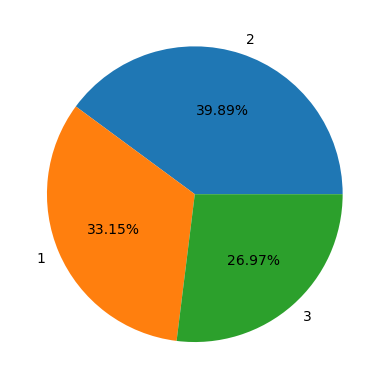

In [15]:
plt.pie(y.value_counts(),labels=y.value_counts().index, autopct='%2.2f%%')

##### Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

In [28]:
skf=SelectKBest(score_func=chi2,k=5)

In [29]:
skf.fit(x,y)# trained the data

SelectKBest(k=5, score_func=<function chi2 at 0x000002D4F906C040>)

In [30]:
skf.get_support()

array([False, False, False,  True,  True, False,  True, False, False,
        True, False, False,  True])

In [31]:
x_new=x.iloc[:,skf.get_support()]
x_new

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127,3.06,5.64,1065
1,11.2,100,2.76,4.38,1050
2,18.6,101,3.24,5.68,1185
3,16.8,113,3.49,7.80,1480
4,21.0,118,2.69,4.32,735
...,...,...,...,...,...
173,20.5,95,0.61,7.70,740
174,23.0,102,0.75,7.30,750
175,20.0,120,0.69,10.20,835
176,20.0,120,0.68,9.30,840


In [37]:
df_new=x_new.copy()
df_new['class']=y

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

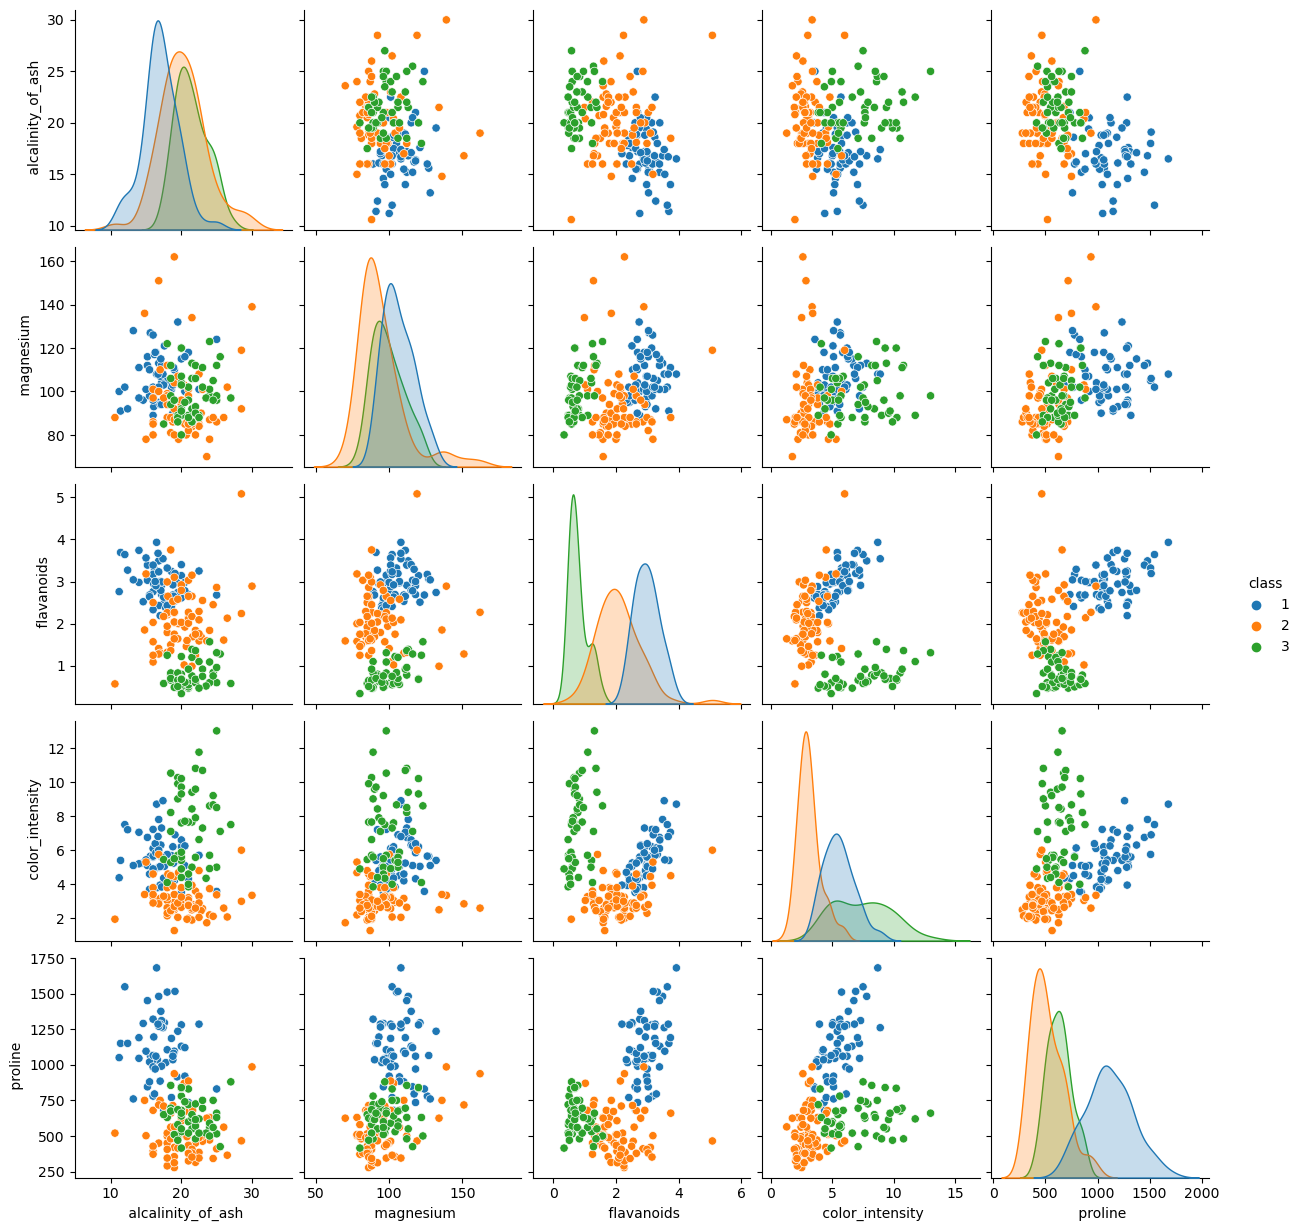

In [36]:
sns.pairplot(df_new, hue='class', palette='tab10')

##### Cross_validation

In [38]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test=train_test_split(x_new,y,random_state=0, stratify=y)

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((133, 5), (45, 5), (133,), (45,))

In [68]:
x_test.shape

(45, 5)

##### Build the model

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
clf_nb=GaussianNB()

In [71]:
clf_nb.fit(x_train,y_train)# trained the data on giving input and output

GaussianNB()

##### Performance Evaluation

In [72]:
y_pred=clf_nb.predict(x_test) # find the prediction of output y on giving input x as test

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score# import confusion matrix and accuracy score from sklearn.metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay# import classification_report and confusionMatrixDisplay from sklearn.metrics

In [74]:
print(confusion_matrix(y_test,y_pred))# print confusion_matrix which take two parameter y known and y predicted and give how
# much variance they have in result for each class 1,2,3

[[14  1  0]
 [ 0 17  1]
 [ 0  0 12]]


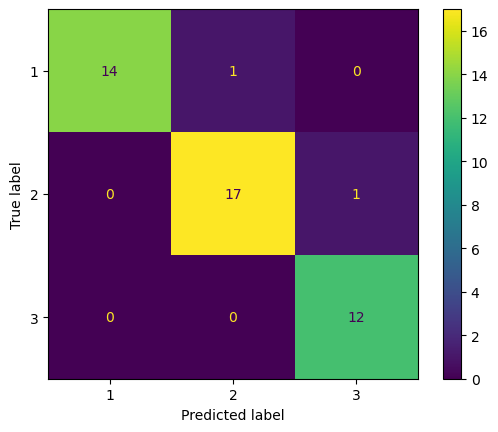

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [76]:
accuracy_score(y_test,y_pred)

0.9555555555555556

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      0.94      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [78]:
x_train.shape

(133, 5)